# Object Oriented Programming
## J. S. Oishi

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Programming "Paradigms"
Ways of organizing programs

* Procedural (e.g. FORTRAN, C)
* Functional (e.g. LISP, Haskall)
* Object Oriented (e.g. C++, Java)

### Python is...all of these

Python is a multi-paradigmatic language; this is why you may have programed for years in python and not know what an object is.

## Objects

Objects have 

* data called **attributes**
* functions to act on their data called **methods**

In [2]:
class Observation(): # "object" and "class" are interchangable!
    def __init__(self, data): # method
        self.data = data #attribute
    def average(self): # method
        dsum = 0
        for i,d in enumerate(self.data):
            dsum += d
        average=dsum/(i+1)
        return average

## Instances

*Instances* are not the same thing as *objects*

In [3]:
obs1 = Observation([0,1,2])
obs2 = Observation([4,5,6])

In [4]:
print("Avg 1 = {:e}; Avg 2 = {:e}".format(obs1.average(), obs2.average()))
print("Type of Avg 1 = {:}; Type of Avg 2 = {:}".format(type(obs1), type(obs2)))

Avg 1 = 1.000000e+00; Avg 2 = 5.000000e+00
Type of Avg 1 = <class '__main__.Observation'>; Type of Avg 2 = <class '__main__.Observation'>


In [5]:
print(obs1.data)
print(obs2.data)

[0, 1, 2]
[4, 5, 6]


## Inheritance

We can make new objects by adding to existing objects. This is called **inheritance**

In [6]:
class TimeSeries(Observation): # inherits all the methods and attributes from Observation
    def __init__(self, time, data):
        self.time = time
        Observation.__init__(self, data) # this calls the constructor of the base class
        if len(self.time) != len(self.data):
            raise ValueError("Time and data must have same length!")
    def stop_time(self):
        return self.time[-1] # unclear why you would want this

In [7]:
tobs = TimeSeries([0,1,2],[3,4,5])
print(tobs)
print("Stop time = {:e}".format(tobs.stop_time())) # new method
print("tobs average = {:e}".format(tobs.average())) # but tobs also has methods from Observation

Stop time = 2.000000e+00
tobs average = 4.000000e+00


## Objects in practice

In python **everything** is an object:

In [8]:
print(print) #functions are objects!
dont_do_this = print # this is the object representing a function!
dont_do_this("dont do this!")

<built-in function print>
dont do this!


## Example: Matplotlib

Matplotlib has a completely object oriented way of dealing with plots, which is *very* well suited to complex figures.

First, some dumb fake data.

In [ ]:
x = np.linspace(0,2*np.pi, 1000) 
y_theory = np.sinc(x)
y = y_theory + np.random.rand(1000)

Text(0, 0.5, 'residual')

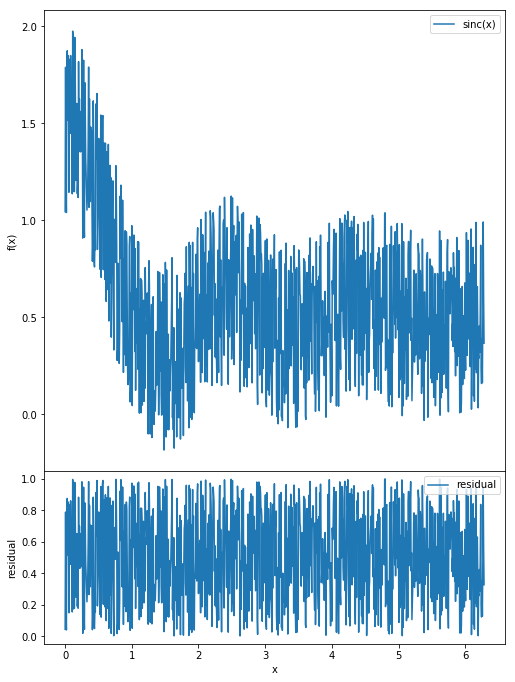

In [23]:
fig = plt.figure(figsize=(8,8)) # create a figure object
ax_data = fig.add_axes([0.1,0.4,0.8,0.8]) # figure objects have an add_axes method
ax_residual = fig.add_axes([0.1,0.1,0.8,0.3]) 

# this is one axis
ax_data.plot(x,y, label='sinc(x)') # a plot is a **method** of a set of axes!
ax_data.legend() # so is a legend
ax_data.set_ylabel('f(x)') # the labels are attributes, set_ylabel sets it
# this is another...just refer to them by name!
ax_residual.plot(x, y-y_theory, label='residual')
ax_residual.legend()
ax_residual.set_xlabel('x')
ax_residual.set_ylabel('residual')